<div> <img style="float:right;" src ="https://res.cloudinary.com/hdsqazxtw/image/upload/v1570710978/coderhouse.jpg"width ="150" height=75> </div>

<b>Autor:</b> Gabriel Cuenca<br>
<b>Fecha:</b> 19-3-2023

<br>


# <div> <center> Proyecto Final <br> <font size=3> Precio de autos en Argentina </font> </center> </div>

---
---


<div>    
    <ul>
        <li> <b> Input:</b> La fuente del dataset es: <a href="https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices"> kaggle </a> </li>
    </ul>
</div>

<br>


Puede consultarse el diccionario de datos en: <a href="https://docs.google.com/spreadsheets/d/16MMvWwdZsBpB0-hx_veyuq6Bm6L7RoIU/edit?usp=sharing&ouid=113653034402671408118&rtpof=true&sd=true"> diccionario de datos </a>

---

**Objetivos**

Se realizará un análisis de las variables del dataset, con el fin de poder estimar o predecir el precio de venta de un vehículo en Argentina. Una vez identificadas, se creará un modelo de regresión que permita predecir el precio justo para el vehículo. Esta herramienta permitirá lograr el máximo nivel de ventas concretadas.

La variable target es "money".


**Fuente**

El listado se obtuvo de vehículos publicados en el sitio mercadolibre.com.ar
    
https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices

**Características Generales**

Este dataset contiene datos reales de la oferta de vehículos en Argentina, publicadas en el sitio Mercado Libre (https://www.mercadolibre.com.ar/).

Fundada por Marcos Galperín, Mercado Libre es la compañía más valiosa del país y la única latinoamericana en este Top 100. Además, es la primera nacida en Argentina en acceder al ranking Kantar BrandZ desde que fue publicado por primera vez en 2006.

El dataset posee 510 filas, cada una de las cuales es un vehículo publicado en la plataforma, con datos del año 2020.
El dataset contiene además 12 variables entre las que se describen las características del vehículo, y su valor, ya sea en pesos o en dólares. 

En la siguiente sección se provee una descripción detallada de las mismas. 



**Money**	Valor del vehículo (puede ser en pesos o en dólares)

**Brand**	Marca del vehículo

**Model**	Modelo del vehículo

**Year**	Año de fabricación del vehículo

**Color**	Color del vehículo

**Fuel_type** Tipo de combustible del vehículo

**Door**	Cantidad de puertas del vehículo

**Gear**	Transmisión del vehículo

**Long**	Motor del vehículo

**body_type**	Tipo de Carrocería

**Kilometres**	Cantidad de kilómetros del vehículo

**Currency**	Tipo de cambio (Pesos o dólares)

## Importación de librerías

In [1035]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

#Visual
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# opciones de visualización de pandas
pd.options.display.max_rows = 50
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format


## Carga de datos

In [1036]:
car = pd.read_csv('argentina_car.zip', compression='zip')
car.head(10)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.00,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.00,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.00,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.00,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.00,Manual,1.8,Sedán,9000,pesos
5,34500,Jeep,Compass,2022,Negro,Nafta,5.00,Automática,1.3,SUV,10500,dólares
6,25000,Kia,Sorento,2014,Negro,Diésel,5.00,Automática,2.2,SUV,156000,dólares
7,12300,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4.00,Automática,1.8,Sedán,174000,dólares
8,35500,BMW,220,2016,Blanco,Nafta,2.00,Automática,TURBO,Coupé,66000,dólares
9,6800000,Volkswagen,T-Cross,2019,Naranja,Nafta,5.00,Automática,1.6 MSI Nafta,SUV,35000,pesos


In [1037]:
print("El dataset esta compuesto por ", car.shape[0], " registros y ", car.shape[1], "columnas")

El dataset esta compuesto por  510  registros y  12 columnas


## Análisis exploratorio

In [1038]:
car.describe()

,money,year,door,kilometres
count,510.00,510.00,510.00,510.00
mean,3970188.37,2016.30,4.47,74436.37
std,2918454.46,3.73,0.76,46771.80
min,8000.00,1995.00,2.00,500.00
25%,2312500.00,2014.00,4.00,43000.00
50%,3489900.00,2017.00,5.00,65750.00
75%,5237500.00,2019.00,5.00,99100.00
max,14299000.00,2022.00,5.00,335000.00


In [1039]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


## Normalización de datos

In [1040]:
# transformo el campo 'door' en int
car.door = pd.to_numeric(car.door, downcast='integer')

In [1041]:
car.head(10)

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.8,Sedán,9000,pesos
5,34500,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.3,SUV,10500,dólares
6,25000,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.2,SUV,156000,dólares
7,12300,Mercedes-Benz,Clase C,2008,Plateado,Nafta,4,Automática,1.8,Sedán,174000,dólares
8,35500,BMW,220,2016,Blanco,Nafta,2,Automática,TURBO,Coupé,66000,dólares
9,6800000,Volkswagen,T-Cross,2019,Naranja,Nafta,5,Automática,1.6 MSI Nafta,SUV,35000,pesos


In [1042]:
#Reviso el campo "motor"
car.motor.unique()

array([nan, '2.4', '1.8', '1.3', '2.2', 'TURBO', '1.6 MSI Nafta', '3',
       '1.6', '1.5', '1.2', '2.8', '2.3', '2', '1.4', '2.0', '2.5', '3.6',
       '3.5', '2.1', '1.0', '5.7', '3.2', '3.0', 'TOYOTA 2.8', '4.4',
       '2.8tdi 223cv', '3.0 TD', '5.2', '6.4'], dtype=object)

In [1043]:
# voy a reemplazar los valores '1.6 MSI Nafta', '2.8tdi 223cv', '3.0 TD', 'TOYOTA 2.8' por su valor numeral

In [1044]:
car['motor']=car['motor'].replace(['1.6 MSI Nafta'], '1.6')
car['motor']=car['motor'].replace(['2.8tdi 223cv'], '2.8')
car['motor']=car['motor'].replace(['3.0 TD'], '3.0')
car['motor']=car['motor'].replace(['TOYOTA 2.8'], '2.8')
car





,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.8,Sedán,9000,pesos
...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.8,SUV,52000,pesos
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.0,Pick-Up,49000,dólares
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.6,SUV,75358,pesos
508,44900,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.0,Pick-Up,57500,dólares


In [1045]:
car.motor.unique()

array([nan, '2.4', '1.8', '1.3', '2.2', 'TURBO', '1.6', '3', '1.5', '1.2',
       '2.8', '2.3', '2', '1.4', '2.0', '2.5', '3.6', '3.5', '2.1', '1.0',
       '5.7', '3.2', '3.0', '4.4', '5.2', '6.4'], dtype=object)

In [1046]:
#reviso qué es el valor 'TURBO'
car[car.motor=='TURBO']


,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
8,35500,BMW,220,2016,Blanco,Nafta,2,Automática,TURBO,Coupé,66000,dólares


In [1047]:
# según san google, el auto tiene un motor de 4 cilindros BMW TwinPower Turbo (un turbo) / 1,998 cm3, por lo tanto, voy a asignar el valor 2.0
car.loc[8:8,'motor']='2.0'
car.motor.unique()

array([nan, '2.4', '1.8', '1.3', '2.2', '2.0', '1.6', '3', '1.5', '1.2',
       '2.8', '2.3', '2', '1.4', '2.5', '3.6', '3.5', '2.1', '1.0', '5.7',
       '3.2', '3.0', '4.4', '5.2', '6.4'], dtype=object)

In [1048]:
#ahora que todos los valores son numéricos, paso la columna 'motor' a float
car.motor = pd.to_numeric(car.motor, downcast='float')
car.motor

0      NaN
1     2.40
2     2.40
3      NaN
4     1.80
      ... 
505   1.80
506   3.00
507   1.60
508   3.00
509   1.50
Name: motor, Length: 510, dtype: float32

In [1049]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    int8   
 7   gear        509 non-null    object 
 8   motor       499 non-null    float32
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float32(1), int64(3), int8(1), object(7)
memory usage: 42.5+ KB


## Análisis de nulos

In [1050]:
car.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [1051]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(car.isnull().sum()/car.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

color       2.16
motor       2.16
gear        0.20
body_type   0.20
dtype: float64

<AxesSubplot:>

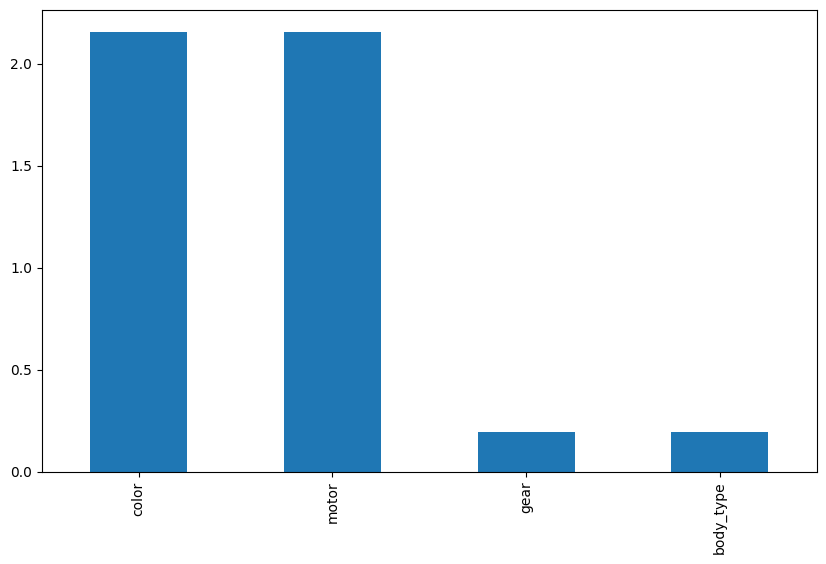

In [1052]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
car_nulos.plot(kind='bar')

## Como el dataset no es muy grande, voy a intentar salvarlos

In [1053]:
#Traigo los casos que tengan el dato del motor nulo
car[car.motor.isnull()]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,NaN,SUV,500,pesos
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,NaN,SUV,550,dólares
12,3500000,Renault,Sandero,2022,Plateado,Nafta,5,Manual,NaN,Sedán,111111,pesos
14,41900,BMW,Serie 1,2020,Negro,Nafta,5,Automática,NaN,Hatchback,34800,dólares
16,38500,Chevrolet,Trailblazer,2019,Gris,Diésel,5,Automática,NaN,SUV,73000,dólares
24,2800000,Fiat,Bravo,2013,Negro,Nafta,5,Manual,NaN,Hatchback,124000,pesos
31,10200000,Toyota,Hilux,2022,Negro,Diésel,4,Manual,NaN,Pick-Up,21000,pesos
34,3150000,Ford,Fiesta,2016,Rojo,Nafta,5,Manual,NaN,Hatchback,68000,pesos
55,23500,Hyundai,Genesis,2012,Gris,Nafta,2,Manual,NaN,Coupé,104270,dólares
56,79900,Porsche,Panamera,2010,Blanco,Nafta,4,Automática,NaN,Sedán,59141,dólares


In [1054]:
#Para el primer registro nulo, vemos que el motor del Corolla Cross es 1.8, así que se lo asignamos al valor faltante 
car[car.model=='Corolla Cross'] 

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,NaN,SUV,500,pesos
47,11290000,Toyota,Corolla Cross,2022,Rojo,Híbrido/Nafta,5,Automática,1.80,SUV,510,pesos
269,12490000,Toyota,Corolla Cross,2022,Negro,Híbrido/Nafta,5,Automática,1.80,SUV,2000,pesos


In [1055]:
car.loc[0, 'motor']='1.8'
car.loc[0:0]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5,Automática,1.8,SUV,500,pesos


## Voy a intentar hacer la asignación de valores masivamente

In [1056]:
#primero me traigo el modelo de todos los valores nulos
sin_motor=car.model[car.motor.isnull()]
sin_motor

3        C4 Cactus
12         Sandero
14         Serie 1
16     Trailblazer
24           Bravo
31           Hilux
34          Fiesta
55         Genesis
56        Panamera
278            Uno
Name: model, dtype: object

In [1057]:
#me traigo todos los modelos que ya tienen un valor en 'motor'
con_motor=car[['model','fuel_type','motor']][car.model.isin(sin_motor)].dropna()
con_motor
                                        
                  
                  

,model,fuel_type,motor
23,Hilux,Diésel,2.80
60,C4 Cactus,Nafta,1.20
88,Hilux,Diésel,2.80
98,Sandero,Nafta,1.60
100,Sandero,Nafta,1.60
121,Hilux,Diésel,2.80
127,Sandero,Nafta,1.60
128,Uno,Nafta,1.40
130,Sandero,Nafta,1.60
169,Hilux,Diésel,2.80


In [1058]:
#Elimino registros duplicados
con_motor.drop_duplicates()
con_motor=con_motor.drop_duplicates()
con_motor

,model,fuel_type,motor
23,Hilux,Diésel,2.80
60,C4 Cactus,Nafta,1.20
98,Sandero,Nafta,1.60
128,Uno,Nafta,1.40
230,Serie 1,Nafta,2.00
275,Trailblazer,Diésel,2.80
355,Serie 1,Nafta,1.60


In [1059]:
# ahora si, pego los datos faltantes con un for
for i in range(len(car[car.motor.isnull()])):
    for y in range(len([con_motor])):
        if car.iloc[i]['model']==con_motor.iloc[y]['model']: #acá intento que si el modelo es igual, pegue el dato del motor
           car.iloc[i]['motor']= con_motor.iloc[y]['motor']
      #  print(con_motor.iloc[i]['model'])
        
        

In [1060]:
# no me funcionó el for
car[car.motor.isnull()]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,NaN,SUV,550,dólares
12,3500000,Renault,Sandero,2022,Plateado,Nafta,5,Manual,NaN,Sedán,111111,pesos
14,41900,BMW,Serie 1,2020,Negro,Nafta,5,Automática,NaN,Hatchback,34800,dólares
16,38500,Chevrolet,Trailblazer,2019,Gris,Diésel,5,Automática,NaN,SUV,73000,dólares
24,2800000,Fiat,Bravo,2013,Negro,Nafta,5,Manual,NaN,Hatchback,124000,pesos
31,10200000,Toyota,Hilux,2022,Negro,Diésel,4,Manual,NaN,Pick-Up,21000,pesos
34,3150000,Ford,Fiesta,2016,Rojo,Nafta,5,Manual,NaN,Hatchback,68000,pesos
55,23500,Hyundai,Genesis,2012,Gris,Nafta,2,Manual,NaN,Coupé,104270,dólares
56,79900,Porsche,Panamera,2010,Blanco,Nafta,4,Automática,NaN,Sedán,59141,dólares
278,1760000,Fiat,Uno,2010,Rojo,Nafta,5,Manual,NaN,NaN,128000,pesos


In [1061]:
# creo que el for de arriba no funciona porque el tipo de dato 'motor' en con_motor es un object. voy a pasarlo a float
con_motor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 23 to 355
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   model      7 non-null      object
 1   fuel_type  7 non-null      object
 2   motor      7 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [1062]:
con_motor.motor = pd.to_numeric(con_motor.motor, downcast='float')
con_motor.motor

23    2.80
60    1.20
98    1.60
128   1.40
230   2.00
275   2.80
355   1.60
Name: motor, dtype: float32

In [1063]:
con_motor

,model,fuel_type,motor
23,Hilux,Diésel,2.80
60,C4 Cactus,Nafta,1.20
98,Sandero,Nafta,1.60
128,Uno,Nafta,1.40
230,Serie 1,Nafta,2.00
275,Trailblazer,Diésel,2.80
355,Serie 1,Nafta,1.60


In [1064]:
#voy de nuevo
for i in range(len(car[car.motor.isnull()])):
    for y in range(len([con_motor])):
        if car.iloc[i]['model']==con_motor.iloc[y]['model']: #acá intento que si el modelo es igual, pegue el dato del motor
           car.iloc[i]['motor']= con_motor.iloc[y]['motor']

In [1065]:
car[car.motor.isnull()]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5,Automática,NaN,SUV,550,dólares
12,3500000,Renault,Sandero,2022,Plateado,Nafta,5,Manual,NaN,Sedán,111111,pesos
14,41900,BMW,Serie 1,2020,Negro,Nafta,5,Automática,NaN,Hatchback,34800,dólares
16,38500,Chevrolet,Trailblazer,2019,Gris,Diésel,5,Automática,NaN,SUV,73000,dólares
24,2800000,Fiat,Bravo,2013,Negro,Nafta,5,Manual,NaN,Hatchback,124000,pesos
31,10200000,Toyota,Hilux,2022,Negro,Diésel,4,Manual,NaN,Pick-Up,21000,pesos
34,3150000,Ford,Fiesta,2016,Rojo,Nafta,5,Manual,NaN,Hatchback,68000,pesos
55,23500,Hyundai,Genesis,2012,Gris,Nafta,2,Manual,NaN,Coupé,104270,dólares
56,79900,Porsche,Panamera,2010,Blanco,Nafta,4,Automática,NaN,Sedán,59141,dólares
278,1760000,Fiat,Uno,2010,Rojo,Nafta,5,Manual,NaN,NaN,128000,pesos


In [1066]:
#no hay caso, el for no funciona. voy a hacerlo manual
car.loc[3, 'motor']='1.2'
car.loc[12, 'motor']='1.6'
car.loc[14, 'motor']='1.5' #como no tengo más info, googlé qué motor tiene el BMW Serie 1
car.loc[16, 'motor']='2.8'
car.loc[24, 'motor']='1.4' #googleado
car.loc[31, 'motor']='2.8'
car.loc[34, 'motor']='1.6' #googleado
car.loc[55, 'motor']='1.2'
car.loc[56, 'motor']='2.0' #también googleado
car.loc[278, 'motor']='1.4'


In [1067]:
#listo, todos los registros tienen el dato del motor completo
car[car.motor.isnull()]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency


In [1068]:
# me quedan 11 datos nulos de color, que no los considero importante para el análisis,pero me queda un dato faltante en body_type y otro en tipo de caja (manual o automático)
car.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor          0
body_type      1
kilometres     0
currency       0
dtype: int64

In [1069]:
# veo cuál es
car[car.gear.isnull()]


,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
211,60000,Toyota,Hilux,2022,Negro,Diésel,4,NaN,2.80,Pick-Up,4000,dólares


In [1070]:
# busco uno con el dato completo. En base a esto, no puedo determinar qué valor ponerle al faltante
car[(car['model']=='Hilux') & (car['fuel_type']=='Diésel')]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
23,8300000,Toyota,Hilux,2017,Rojo,Diésel,4,Manual,2.80,Pick-Up,170000,pesos
31,10200000,Toyota,Hilux,2022,Negro,Diésel,4,Manual,2.8,Pick-Up,21000,pesos
88,11900000,Toyota,Hilux,2019,Gris,Diésel,4,Automática,2.80,Pick-Up,51700,pesos
121,12400000,Toyota,Hilux,2019,Gris,Diésel,4,Automática,2.80,Pick-Up,52000,pesos
169,52900,Toyota,Hilux,2022,Blanco,Diésel,4,Automática,2.80,Pick-Up,1000,dólares
211,60000,Toyota,Hilux,2022,Negro,Diésel,4,NaN,2.80,Pick-Up,4000,dólares
249,8600000,Toyota,Hilux,2017,Blanco,Diésel,4,Automática,2.80,Pick-Up,170000,pesos
271,35499,Toyota,Hilux,2020,Plateado,Diésel,4,Automática,2.80,Pick-Up,57700,dólares
279,12489000,Toyota,Hilux,2019,Blanco,Diésel,4,Automática,2.80,Pick-Up,64000,pesos
300,11900000,Toyota,Hilux,2019,Gris,Diésel,4,Automática,2.80,Pick-Up,51600,pesos


In [1071]:
# veo cuál registro no tiene el body_type completo
car[car.body_type.isnull()]

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
278,1760000,Fiat,Uno,2010,Rojo,Nafta,5,Manual,1.4,NaN,128000,pesos


In [1072]:
# busco uno con el dato completo
car[car.model=='Uno']

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
128,1975000,Fiat,Uno,2016,Blanco,Nafta,5,Manual,1.40,Hatchback,87000,pesos
278,1760000,Fiat,Uno,2010,Rojo,Nafta,5,Manual,1.4,NaN,128000,pesos


In [1073]:
# lo asigno
car.loc[278, 'body_type']='Hatchback'


In [1074]:
car.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor          0
body_type      0
kilometres     0
currency       0
dtype: int64

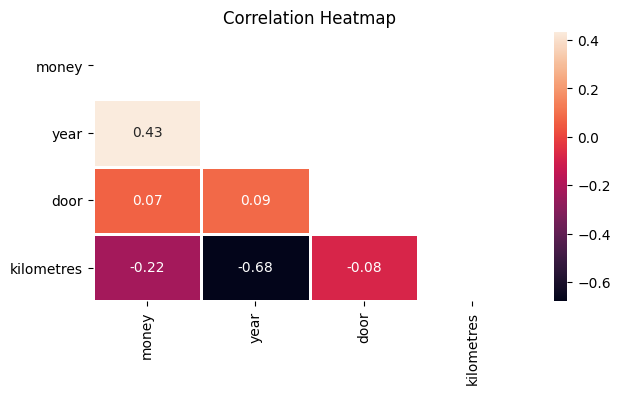

In [1123]:
plt.figure(dpi = 100,figsize= (7,3.5))
mask = np.triu(np.ones_like(car_2.corr(),dtype = bool))
sns.heatmap(car_2.corr(),mask = mask, fmt = ".2f",annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [1075]:
#creo un nuevo DF utilizando solo las columnas que importantes para el logaritmo. 
car_2= car[['brand','money','model','year','fuel_type','door','gear','motor','body_type','kilometres','currency']][car.gear.notnull()]
car_2

,brand,money,model,year,fuel_type,door,gear,motor,body_type,kilometres,currency
0,Toyota,10350000,Corolla Cross,2022,Nafta,5,Automática,1.8,SUV,500,pesos
1,Jeep,10850000,Compass,2022,Nafta,5,Automática,2.40,SUV,500,pesos
2,Jeep,35500,Compass,2022,Nafta,5,Automática,2.40,SUV,500,dólares
3,Citroën,19000,C4 Cactus,2022,Nafta,5,Automática,1.2,SUV,550,dólares
4,Toyota,5800000,Corolla,2019,Nafta,4,Manual,1.80,Sedán,9000,pesos
5,Jeep,34500,Compass,2022,Nafta,5,Automática,1.30,SUV,10500,dólares
6,Kia,25000,Sorento,2014,Diésel,5,Automática,2.20,SUV,156000,dólares
7,Mercedes-Benz,12300,Clase C,2008,Nafta,4,Automática,1.80,Sedán,174000,dólares
8,BMW,35500,220,2016,Nafta,2,Automática,2.00,Coupé,66000,dólares
9,Volkswagen,6800000,T-Cross,2019,Nafta,5,Automática,1.60,SUV,35000,pesos


In [1076]:
car_2.body_type.unique()

array(['SUV', 'Sedán', 'Coupé', 'Hatchback', 'Pick-Up', 'Crossover',
       'Monovolumen', 'Rural', 'Furgón', 'Minivan'], dtype=object)

In [1077]:
# ahora abro las columnas fuel_type, gear y body_type por medio de la funcion get_dummies
car_3=pd.get_dummies(car_2,columns=["fuel_type","gear","body_type"],dummy_na = True)
car_3

,brand,money,model,year,door,motor,kilometres,currency,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan
0,Toyota,10350000,Corolla Cross,2022,5,1.8,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Jeep,10850000,Compass,2022,5,2.40,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Jeep,35500,Compass,2022,5,2.40,500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Citroën,19000,C4 Cactus,2022,5,1.2,550,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Toyota,5800000,Corolla,2019,4,1.80,9000,pesos,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,Jeep,34500,Compass,2022,5,1.30,10500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,Kia,25000,Sorento,2014,5,2.20,156000,dólares,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Mercedes-Benz,12300,Clase C,2008,4,1.80,174000,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,BMW,35500,220,2016,2,2.00,66000,dólares,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Volkswagen,6800000,T-Cross,2019,5,1.60,35000,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1078]:
#creo la columna precio para pasar todo a pesos
car_3['precio']=0
car_3

,brand,money,model,year,door,motor,kilometres,currency,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio
0,Toyota,10350000,Corolla Cross,2022,5,1.8,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Jeep,10850000,Compass,2022,5,2.40,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Jeep,35500,Compass,2022,5,2.40,500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Citroën,19000,C4 Cactus,2022,5,1.2,550,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Toyota,5800000,Corolla,2019,4,1.80,9000,pesos,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Jeep,34500,Compass,2022,5,1.30,10500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,Kia,25000,Sorento,2014,5,2.20,156000,dólares,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,Mercedes-Benz,12300,Clase C,2008,4,1.80,174000,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,BMW,35500,220,2016,2,2.00,66000,dólares,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,Volkswagen,6800000,T-Cross,2019,5,1.60,35000,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1079]:
# ahora transformo todo a pesos en una nueva columna, tomando el dolar a 380
# creo una funcion para convertir el precio final en el caso que esté en dolares
def precio_final(x,y):
    if y == 'dólares':
        return x * 380
    if y == 'pesos':
        return x

precio_final

<function __main__.precio_final(x, y)>

In [1080]:
# chequeo que la función "funcione"
precio_final(123, "dólares")


46740

In [1081]:
# lamentablemente no me toma la funcion en el dataframe
for i in range(len(car_3)):
        car_3.iloc[i]['precio']=precio_final(car_3.iloc[i]['money'], car_3.iloc[i]['currency'])
car_3.head(5)     
          

,brand,money,model,year,door,motor,kilometres,currency,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio
0,Toyota,10350000,Corolla Cross,2022,5,1.8,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Jeep,10850000,Compass,2022,5,2.40,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Jeep,35500,Compass,2022,5,2.40,500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Citroën,19000,C4 Cactus,2022,5,1.2,550,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Toyota,5800000,Corolla,2019,4,1.80,9000,pesos,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1082]:
#intento hacerlo manualmente.... tampoco me deja

for i in range(len(car_3)):
        if car_3.iloc[i]['currency']=='dólares': 
            car_3.iloc[i]['precio']=car_3.iloc[i]['money'] * 380   
        else:
          car_3.iloc[i]['precio']=car_3.iloc[i]['money']
car_3.head(5)


,brand,money,model,year,door,motor,kilometres,currency,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio
0,Toyota,10350000,Corolla Cross,2022,5,1.8,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Jeep,10850000,Compass,2022,5,2.40,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Jeep,35500,Compass,2022,5,2.40,500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Citroën,19000,C4 Cactus,2022,5,1.2,550,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Toyota,5800000,Corolla,2019,4,1.80,9000,pesos,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1083]:
# voy a intentar hacerlo por último en una sola sentencia condicional (ahora si!!!)
car_3['precio'] = np.where(car_3['currency']=='dólares',car_3['money']*380, car_3['money'])
car_3.head(5)


,brand,money,model,year,door,motor,kilometres,currency,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio
0,Toyota,10350000,Corolla Cross,2022,5,1.8,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000
1,Jeep,10850000,Compass,2022,5,2.40,500,pesos,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000
2,Jeep,35500,Compass,2022,5,2.40,500,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000
3,Citroën,19000,C4 Cactus,2022,5,1.2,550,dólares,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000
4,Toyota,5800000,Corolla,2019,4,1.80,9000,pesos,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000


## Análisis Univariable

[Text(0.5, 1.0, 'Cantidades de por tipo de moneda')]

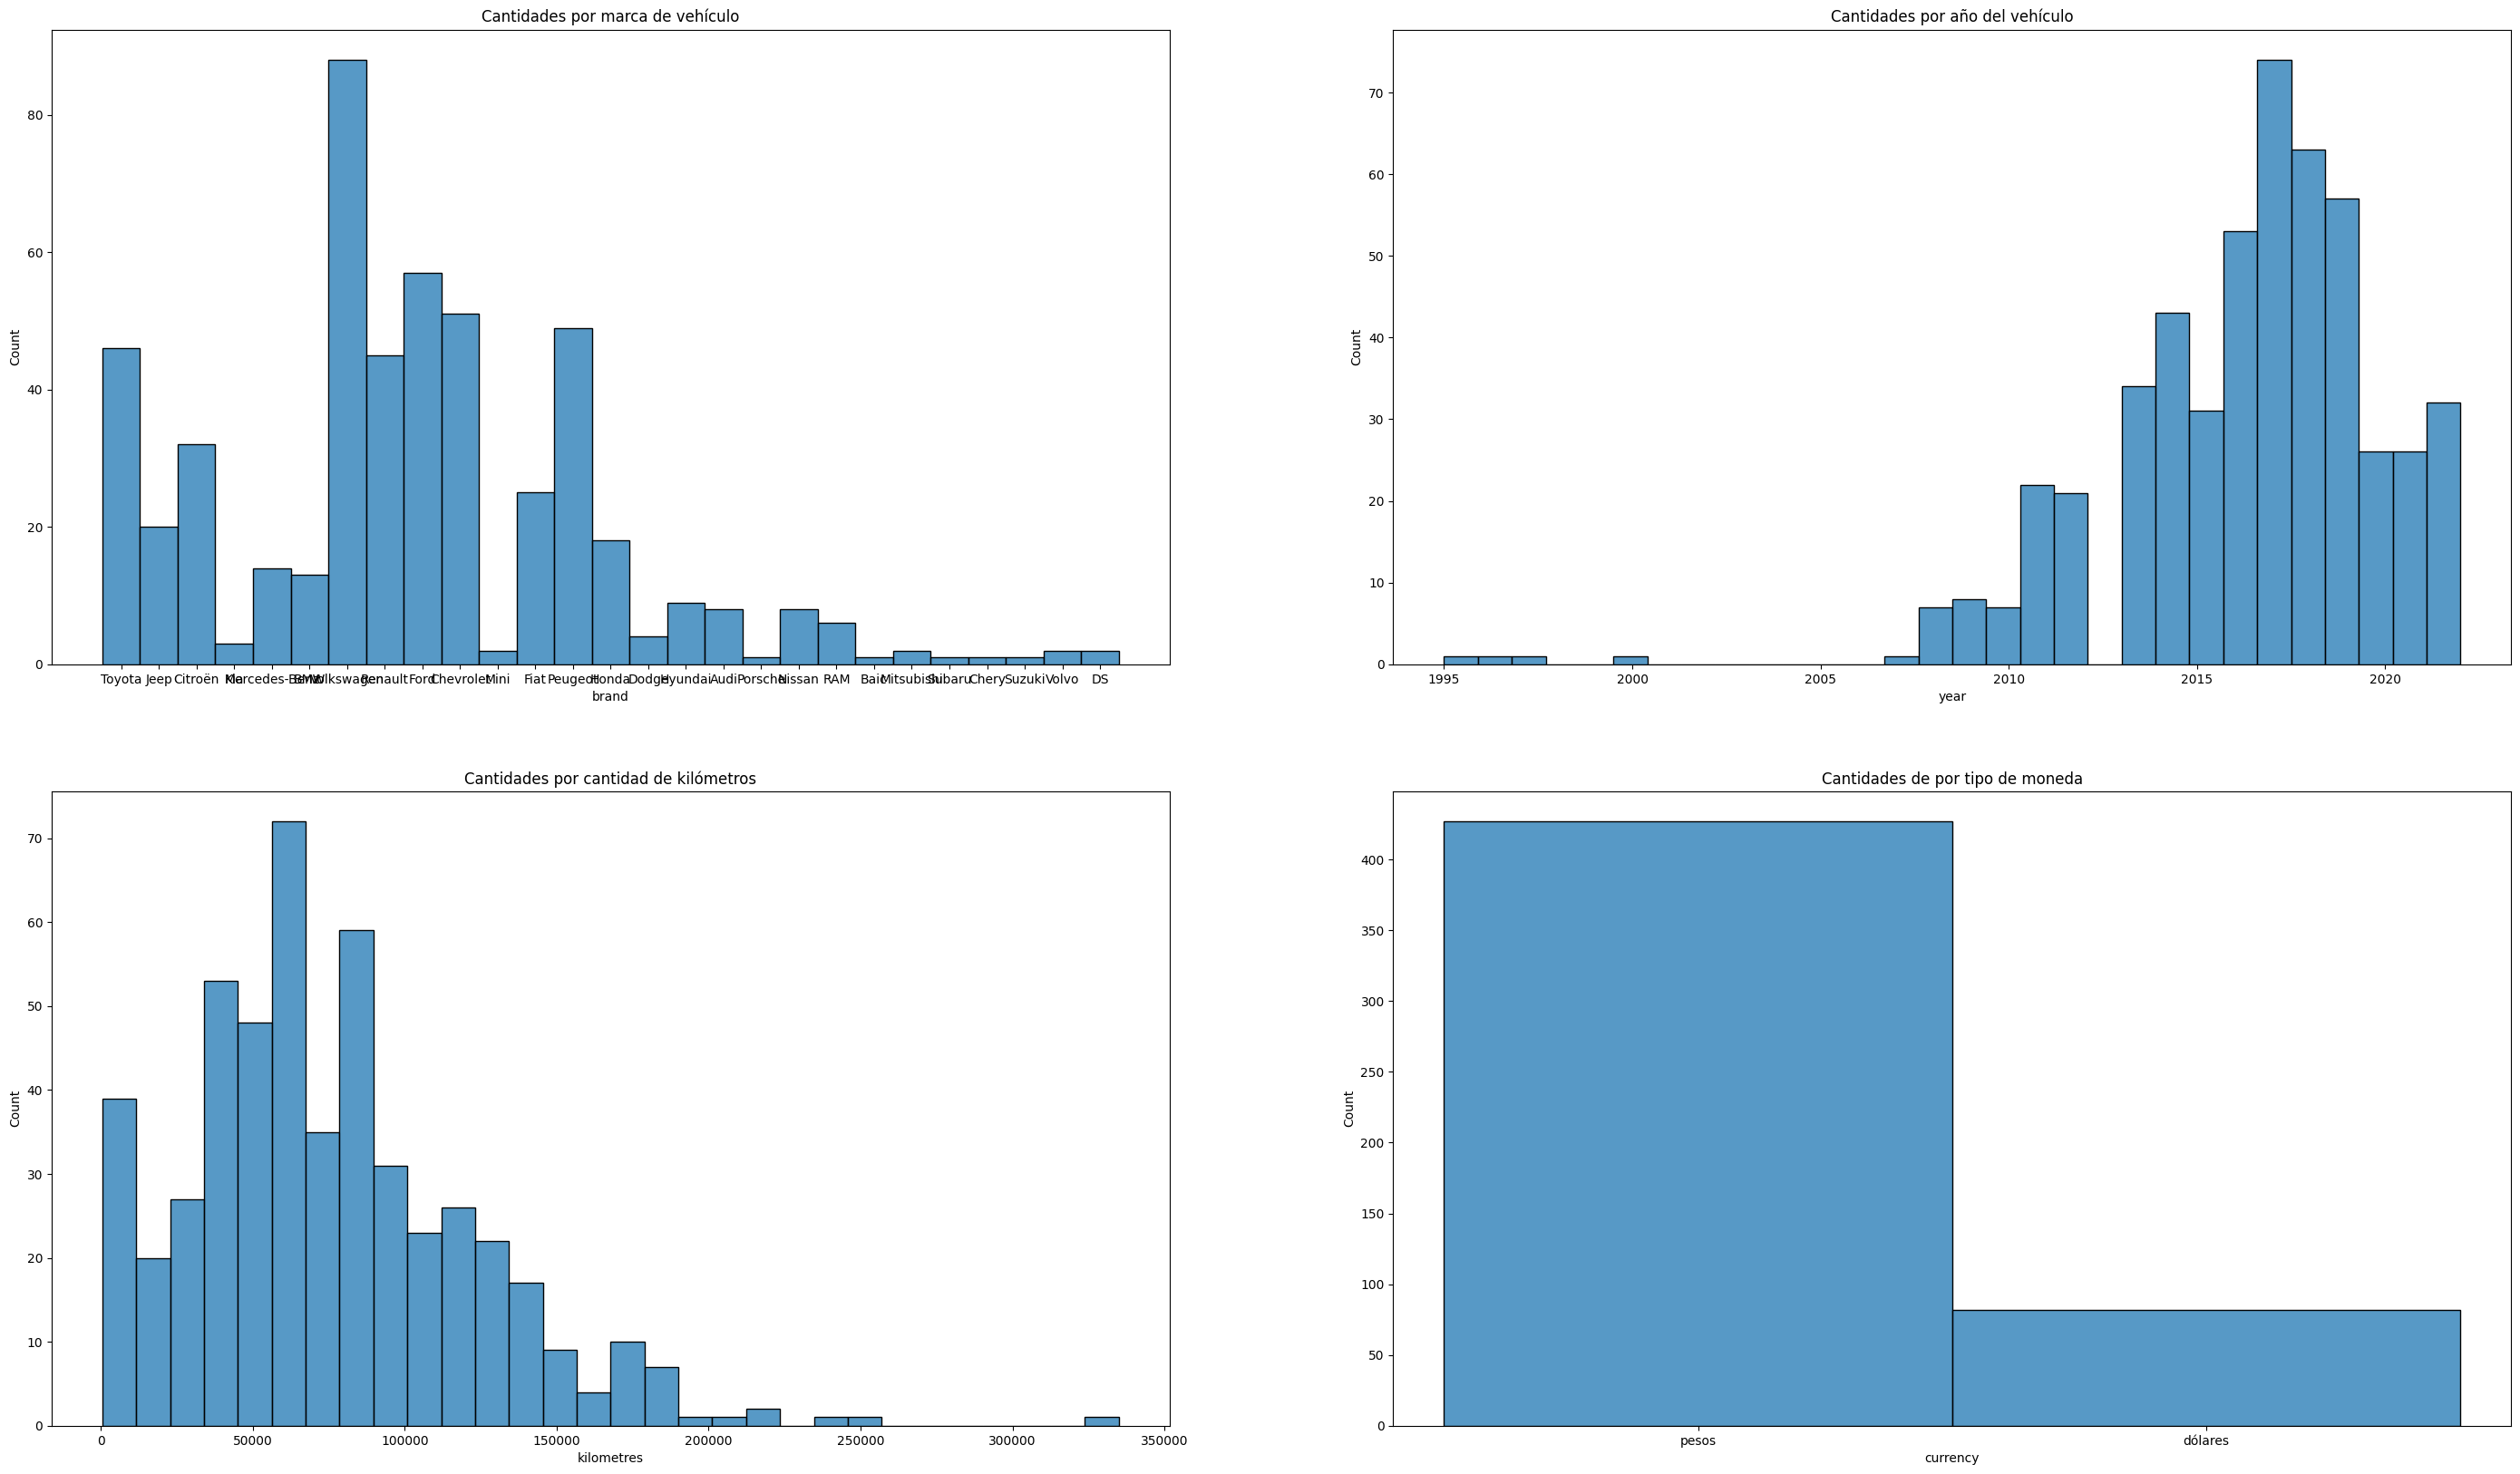

In [1084]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs= plt.subplots(nrows=2,ncols=2, figsize=(35,20))
sns.histplot(car_3.brand, kde=False, bins=30,ax=axs[0,0]).set(title='Cantidades por marca de vehículo')
sns.histplot(car_3.year, kde=False, bins=30,ax=axs[0,1]).set(title='Cantidades por año del vehículo')
sns.histplot(car_3.kilometres, kde=False, bins=30,ax=axs[1,0]).set(title='Cantidades por cantidad de kilómetros')
sns.histplot(car_3.currency, kde=False, bins=30,ax=axs[1,1]).set(title='Cantidades de por tipo de moneda')






## Análisis Bivariable

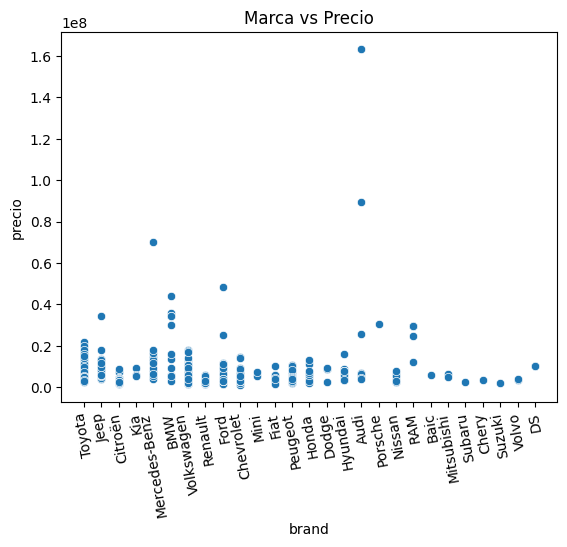

In [1085]:
sns.scatterplot(data=car_3, x="brand", y="precio")
plt.title('Marca vs Precio')
plt.xticks(rotation = 100)
plt.show()

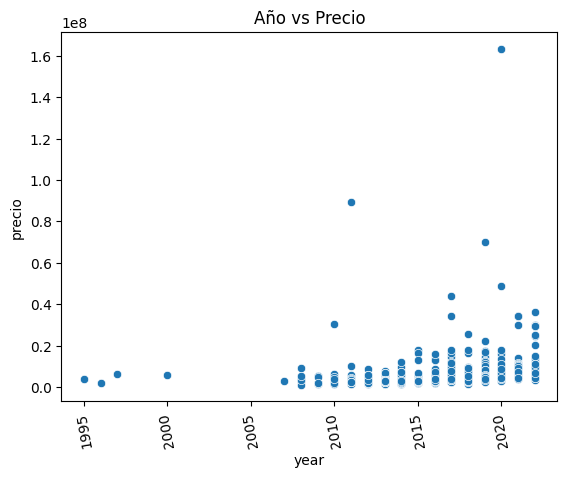

In [1086]:
sns.scatterplot(data=car_3, x="year", y="precio")
plt.title('Año vs Precio')
plt.xticks(rotation = 100)
plt.show()

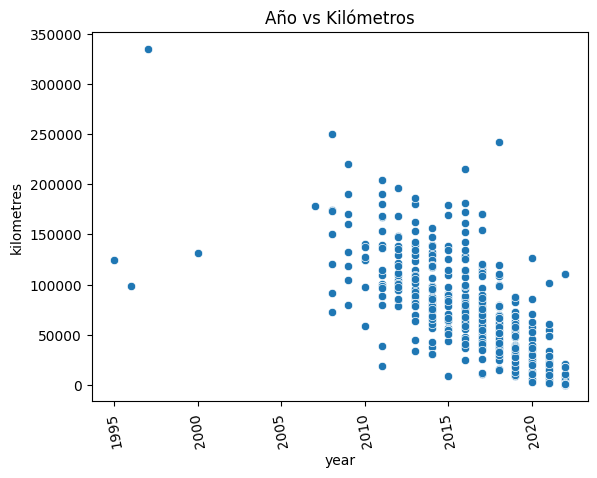

In [1087]:
sns.scatterplot(data=car_3, x="year", y="kilometres")
plt.title('Año vs Kilómetros')
plt.xticks(rotation = 100)
plt.show()

## Borrado de columnas

In [1089]:
# creo un nuevo dataframe sacando las columnas 'money' y 'currency'
car_4= car_3.drop(['money','currency'],axis=1)
car_4.head(5)


,brand,model,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio
0,Toyota,Corolla Cross,2022,5,1.8,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000
1,Jeep,Compass,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000
2,Jeep,Compass,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000
3,Citroën,C4 Cactus,2022,5,1.2,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000
4,Toyota,Corolla,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000


## Recodificar variables categóricas

In [1090]:
#ahora tengo que pasar a numérico los campos 'model'y 'brend', para poder usarlo en el algoritmo
car_4.model.value_counts()

Amarok                   17
208                      13
Corolla                  13
Focus III                13
Onix                     12
Hilux                    11
408                      11
Vento                    10
308                      10
Compass                  10
Gol Trend                10
Polo                      9
Sandero                   9
Ecosport                  9
Fiesta Kinetic Design     8
C3                        7
Etios                     7
Tracker                   7
Ka                        7
Prisma                    7
Renegade                  7
2008                      7
Ranger                    7
Duster Oroch              6
Duster                    6
HR-V                      6
1500                      6
T-Cross                   6
Palio                     5
Up!                       5
Fit                       5
Territory                 5
C4 Lounge                 5
CR-V                      5
Clio                      5
Cruze               

In [1091]:
car_4.brand.value_counts()

Volkswagen       88
Ford             57
Chevrolet        51
Peugeot          49
Toyota           46
Renault          45
Citroën          32
Fiat             25
Jeep             20
Honda            18
Mercedes-Benz    14
BMW              13
Hyundai           9
Nissan            8
Audi              8
RAM               6
Dodge             4
Kia               3
Mitsubishi        2
Volvo             2
Mini              2
DS                2
Baic              1
Subaru            1
Chery             1
Suzuki            1
Porsche           1
Name: brand, dtype: int64

In [1092]:
# Utilizo la función astype para categorizar
car_4["model"]=car_4["model"].astype('category')
car_4["brand"]=car_4["brand"].astype('category')
car_4.head(5)



,brand,model,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio
0,Toyota,Corolla Cross,2022,5,1.8,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000
1,Jeep,Compass,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000
2,Jeep,Compass,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000
3,Citroën,C4 Cactus,2022,5,1.2,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000
4,Toyota,Corolla,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000


In [1093]:
#ahora pasamos la categoría a datos numéricos
car_4["model_category"]=car_4["model"].cat.codes
car_4["brand_category"]=car_4["brand"].cat.codes
car_4.head(10)

,brand,model,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
0,Toyota,Corolla Cross,2022,5,1.8,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000,47,24
1,Jeep,Compass,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000,43,12
2,Jeep,Compass,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000,43,12
3,Citroën,C4 Cactus,2022,5,1.2,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000,28,5
4,Toyota,Corolla,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000,46,24
5,Jeep,Compass,2022,5,1.30,10500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13110000,43,12
6,Kia,Sorento,2014,5,2.20,156000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,9500000,130,13
7,Mercedes-Benz,Clase C,2008,4,1.80,174000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4674000,38,14
8,BMW,220,2016,2,2.00,66000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,13490000,4,1
9,Volkswagen,T-Cross,2019,5,1.60,35000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6800000,137,25


In [1094]:
#con esto ya puedo eliminar la columna model
car_4=car_4.drop('model',axis=1)
car_4=car_4.drop('brand',axis=1)
car_4.head(5)

,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
0,2022,5,1.8,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000,47,24
1,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000,43,12
2,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000,43,12
3,2022,5,1.2,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000,28,5
4,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000,46,24


In [1095]:
#ahora sólo tengo el campo "motor" como string
car_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 509
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     509 non-null    int64 
 1   door                     509 non-null    int8  
 2   motor                    509 non-null    object
 3   kilometres               509 non-null    int64 
 4   fuel_type_Diésel         509 non-null    uint8 
 5   fuel_type_Híbrido/Nafta  509 non-null    uint8 
 6   fuel_type_Nafta          509 non-null    uint8 
 7   fuel_type_Nafta/GNC      509 non-null    uint8 
 8   fuel_type_nan            509 non-null    uint8 
 9   gear_Automática          509 non-null    uint8 
 10  gear_Manual              509 non-null    uint8 
 11  gear_nan                 509 non-null    uint8 
 12  body_type_Coupé          509 non-null    uint8 
 13  body_type_Crossover      509 non-null    uint8 
 14  body_type_Furgón         509 non-null    u

In [1096]:
car_4["motor"]= pd.to_numeric(car_4.motor, downcast='float')
car_4.head(5)

,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
0,2022,5,1.80,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000,47,24
1,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000,43,12
2,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000,43,12
3,2022,5,1.20,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000,28,5
4,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000,46,24


## Base Final

In [1097]:
car_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 509
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     509 non-null    int64  
 1   door                     509 non-null    int8   
 2   motor                    509 non-null    float32
 3   kilometres               509 non-null    int64  
 4   fuel_type_Diésel         509 non-null    uint8  
 5   fuel_type_Híbrido/Nafta  509 non-null    uint8  
 6   fuel_type_Nafta          509 non-null    uint8  
 7   fuel_type_Nafta/GNC      509 non-null    uint8  
 8   fuel_type_nan            509 non-null    uint8  
 9   gear_Automática          509 non-null    uint8  
 10  gear_Manual              509 non-null    uint8  
 11  gear_nan                 509 non-null    uint8  
 12  body_type_Coupé          509 non-null    uint8  
 13  body_type_Crossover      509 non-null    uint8  
 14  body_type_Furgón         5

## Antes de separar en train y en test, busco si hay outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x17902d20d60>,
 'caps': [<matplotlib.lines.Line2D at 0x17902d211b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17902d20a90>],
 'medians': [<matplotlib.lines.Line2D at 0x17902d21780>],
 'fliers': [<matplotlib.lines.Line2D at 0x17902d21a50>],
 'means': []}

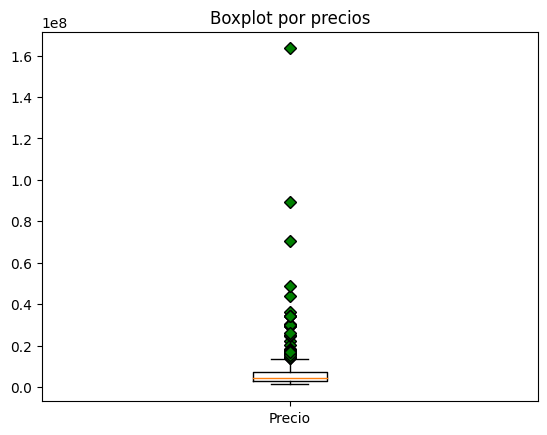

In [1098]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por precios')
ax.boxplot(car_4.precio, flierprops=green_diamond, labels=["Precio"])

In [1099]:
# busco cuál es el valor que está muy por encima del resto
car_4[car_4['precio']==car_4['precio'].max ()]

,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
461,2020,2,5.20,3000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,163400000,109,0


In [1100]:
#En este caso, el outlier es correcto, ya que es un AUDI R8 Coupé que cotiza a ese valor
car.loc[461]

money             430000
brand               Audi
model           R8 Coupé
year                2020
color               Azul
fuel_type          Nafta
door                   2
gear          Automática
motor               5.20
body_type          Coupé
kilometres          3000
currency         dólares
Name: 461, dtype: object

In [1101]:
#Pero igualmente voy a eliminar todo lo que sea mayor a 70 millones de pesos, para no desvirtuar nada
car_4 = car_4.drop(car_4[car_4['precio']>70000000].index)

car_4.head(5)



,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
0,2022,5,1.80,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000,47,24
1,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000,43,12
2,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000,43,12
3,2022,5,1.20,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000,28,5
4,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000,46,24


{'whiskers': [<matplotlib.lines.Line2D at 0x17902d6ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x17902d6b430>,
 'boxes': [<matplotlib.lines.Line2D at 0x17902d6abc0>],
 'medians': [<matplotlib.lines.Line2D at 0x17902d6b9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17902d6bca0>],
 'means': []}

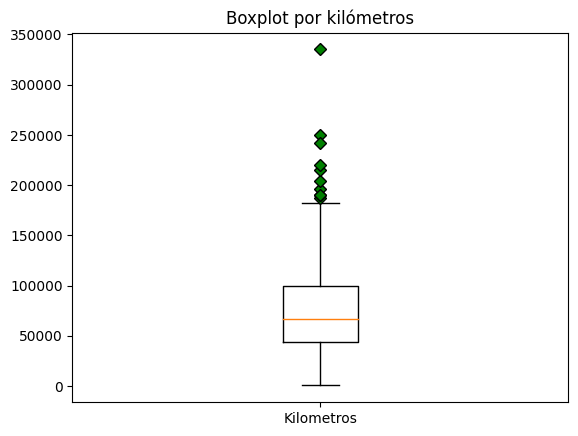

In [1102]:
# busco si tengo algún outlier en kilometros
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por kilómetros')
ax.boxplot(car_4.kilometres, flierprops=green_diamond, labels=["Kilometros"])

In [1103]:
#voy a eliminar todo lo que sea mayor a 220 mil kilómetros
car_4 = car_4.drop(car_4[car_4['kilometres']>220000].index)

car_4.head(5)


,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
0,2022,5,1.80,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000,47,24
1,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000,43,12
2,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000,43,12
3,2022,5,1.20,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000,28,5
4,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000,46,24


{'whiskers': [<matplotlib.lines.Line2D at 0x17902de9c00>,
 'caps': [<matplotlib.lines.Line2D at 0x17902dea1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17902de9930>],
 'medians': [<matplotlib.lines.Line2D at 0x17902dea740>],
 'fliers': [<matplotlib.lines.Line2D at 0x17902deaa10>],
 'means': []}

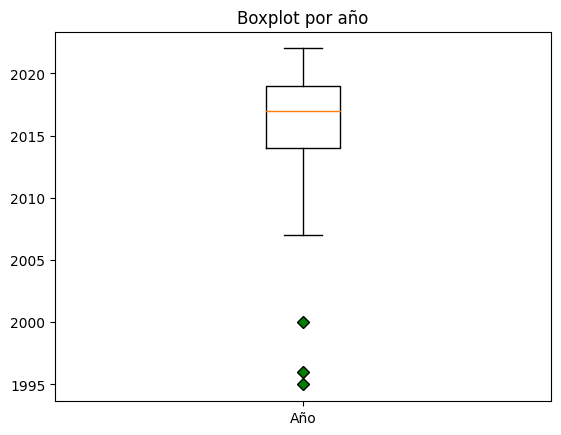

In [1104]:
# busco si tengo algún outlier en años
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot por año')
ax.boxplot(car_4.year, flierprops=green_diamond, labels=["Año"])

In [1105]:
#voy a eliminar todo lo que sea mayor 15 años de antigüedad
car_4 = car_4.drop(car_4[car_4['year']<=2008].index)
car_4.head(5)


,year,door,motor,kilometres,fuel_type_Diésel,fuel_type_Híbrido/Nafta,fuel_type_Nafta,fuel_type_Nafta/GNC,fuel_type_nan,gear_Automática,gear_Manual,gear_nan,body_type_Coupé,body_type_Crossover,body_type_Furgón,body_type_Hatchback,body_type_Minivan,body_type_Monovolumen,body_type_Pick-Up,body_type_Rural,body_type_SUV,body_type_Sedán,body_type_nan,precio,model_category,brand_category
0,2022,5,1.80,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10350000,47,24
1,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10850000,43,12
2,2022,5,2.40,500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13490000,43,12
3,2022,5,1.20,550,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,7220000,28,5
4,2019,4,1.80,9000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5800000,46,24


## Predicción

## Definir entrenamiento y test

In [1293]:
X = car_4.drop('precio', axis = 1) #Elimino de mi dataset la variable a predecir
y = car_4.precio #defino el precio.
print(X.shape, y.shape)

(493, 25) (493,)


In [1314]:
# traigo estos modelos 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Me quedo on 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

## Modelo 1: AdaBoost

In [1315]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=12,learning_rate=0.1, loss='linear',random_state=42)

In [1316]:
#Entreno el modelo
model = ada.fit(X_train, y_train)

In [1317]:
#Predicción
y_pred = model.predict(X_test) # Sacar predicciones con test

In [1318]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.7254650989732581
MSE:  5791793604015.522
MAE:  1212782.5688073393


## Modelo 2: GradientBoosting

In [1319]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=50, subsample=0.8,max_depth=4,criterion='friedman_mse',
                               random_state=42)

In [1320]:
#Entreno el modelo
model1 = gbrt.fit(X_train, y_train)

In [1321]:
y_pred = model1.predict(X_test)

In [1322]:
#Mejoró un poco
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.7894752860815418
MSE:  4441386821857.497
MAE:  888256.3121788381


## Modelo 3: LightGBM

In [1323]:
import lightgbm as lgb #pip install lightgbm
clf = lgb.LGBMRegressor(boosting_type='gbdt',max_depth=4,num_leaves=20,learning_rate=0.01,n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [1324]:
#bastante malo 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.588901516940091
MSE:  8672841070122.944
MAE:  1572645.0771100884


## Modelo 4: XGBoost

In [1325]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [1326]:
#Lo entreno
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1327]:
y_pred = regressor.predict(X_test)

In [1328]:
#Este es el modelo que mejor dio:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.8523002507209745
MSE:  3115984379361.7656
MAE:  756576.5


In [1329]:
#Convertimos en df la salida
comparacion_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparacion_final

,Actual,Predicted
298,3250000,3076696.25
349,11200000,13354855.00
243,2880000,3253614.75
82,4250000,6122607.00
92,5289900,7628707.50
238,5900000,4389844.00
123,3650000,3360155.25
201,6270000,4398820.00
438,10359900,9563510.00
225,2649900,2837010.75
